# EDA
SE OBTENDRA LA BASE DE DATOS DE S&P 500 DE YAHOO FINANCE. 

In [25]:
import yfinance as yf

In [26]:

raw_data = yf.download (tickers = "^GSPC", start = "1994-01-07", 
                              end = "2022-09-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [27]:

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7214 entries, 1994-01-07 to 2022-08-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       7214 non-null   float64
 1   High       7214 non-null   float64
 2   Low        7214 non-null   float64
 3   Close      7214 non-null   float64
 4   Adj Close  7214 non-null   float64
 5   Volume     7214 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 394.5 KB


In [28]:
df = raw_data
raw_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1994-01-07,467.089996,470.260010,467.029999,469.899994,469.899994,324920000
1994-01-10,469.899994,475.269989,469.549988,475.269989,475.269989,319490000
1994-01-11,475.269989,475.279999,473.269989,474.130005,474.130005,305490000
1994-01-12,474.130005,475.059998,472.140015,474.170013,474.170013,310690000
1994-01-13,474.170013,474.170013,471.799988,472.470001,472.470001,277970000


In [29]:
df.reset_index(inplace=True)

In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-01-07,467.089996,470.260010,467.029999,469.899994,469.899994,324920000
1,1994-01-10,469.899994,475.269989,469.549988,475.269989,475.269989,319490000
2,1994-01-11,475.269989,475.279999,473.269989,474.130005,474.130005,305490000
3,1994-01-12,474.130005,475.059998,472.140015,474.170013,474.170013,310690000
4,1994-01-13,474.170013,474.170013,471.799988,472.470001,472.470001,277970000


In [31]:
raw_data.to_csv("S&P500.csv")

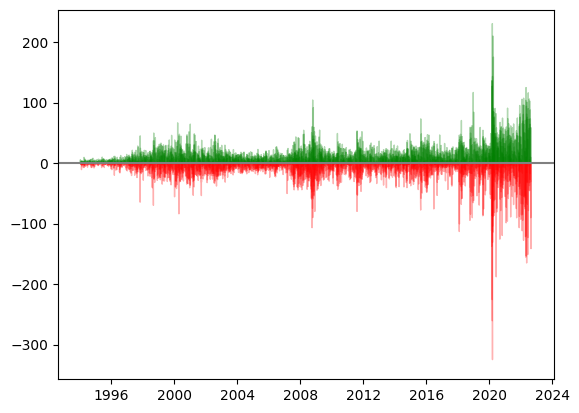

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV y cargar los datos en un dataframe
df = raw_data

# Calcular las pendientes
slopes = df['Close'].diff()
pos_slopes = slopes.where(slopes > 0, other=0)
neg_slopes = slopes.where(slopes < 0, other=0)

# Crear la figura y la subtrama
fig, ax = plt.subplots()

# Graficar los datos del S&P 500
ax.plot(df['Date'], df['Close'], linewidth=2)

# Agregar una línea horizontal en y=0
ax.axhline(0, color='gray')

# Marcar las pendientes positivas y negativas
ax.fill_between(df['Date'], 0, pos_slopes, color='green', alpha=0.3, where=pos_slopes>0, interpolate=True)
ax.fill_between(df['Date'], 0, neg_slopes, color='red', alpha=0.3, where=neg_slopes<0, interpolate=True)

# Ajustar los límites del eje y para incluir todas las pendientes
ax.set_ylim([slopes.min()*1.1, slopes.max()*1.1])

# Mostrar la figura
plt.show()

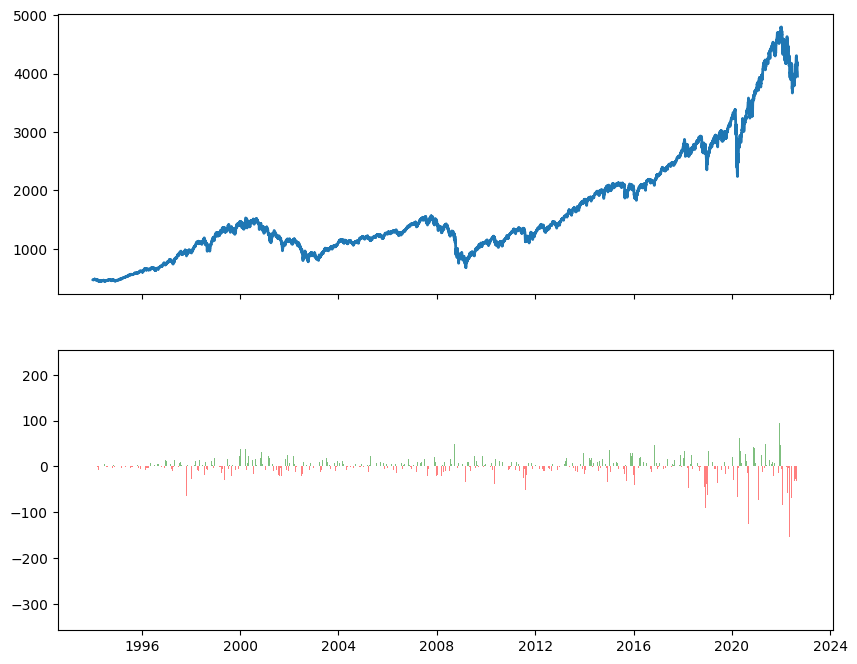

In [33]:


# Calcular las pendientes
slopes = df['Close'].diff()
pos_slopes = slopes.where(slopes > 0, other=0)
neg_slopes = slopes.where(slopes < 0, other=0)

# Crear una figura con dos subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Graficar los datos de cierre del S&P 500 en el subplot superior
axs[0].plot(df['Date'], df['Close'], linewidth=2)

# Graficar las barras apiladas en el subplot inferior
axs[1].bar(df['Date'], pos_slopes, color='green', alpha=0.5)
axs[1].bar(df['Date'], neg_slopes, color='red', alpha=0.5)

# Ajustar los límites del eje y para incluir todas las pendientes
axs[1].set_ylim([slopes.min()*1.1, slopes.max()*1.1])

# Mostrar la figura
plt.show()

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc

In [35]:
def plot_candlestick(df):
    fig, ax = plt.subplots(figsize=(15,8))
    candlestick_ochl(ax, df[['Open', 'Close', 'High', 'Low']].values, width=0.6, colorup='g', colordown='r', alpha=0.8)
    ax.xaxis_date()
    ax.autoscale_view()
    ax.grid(True)
    plt.title('Gráfico de velas S&P500')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.show()




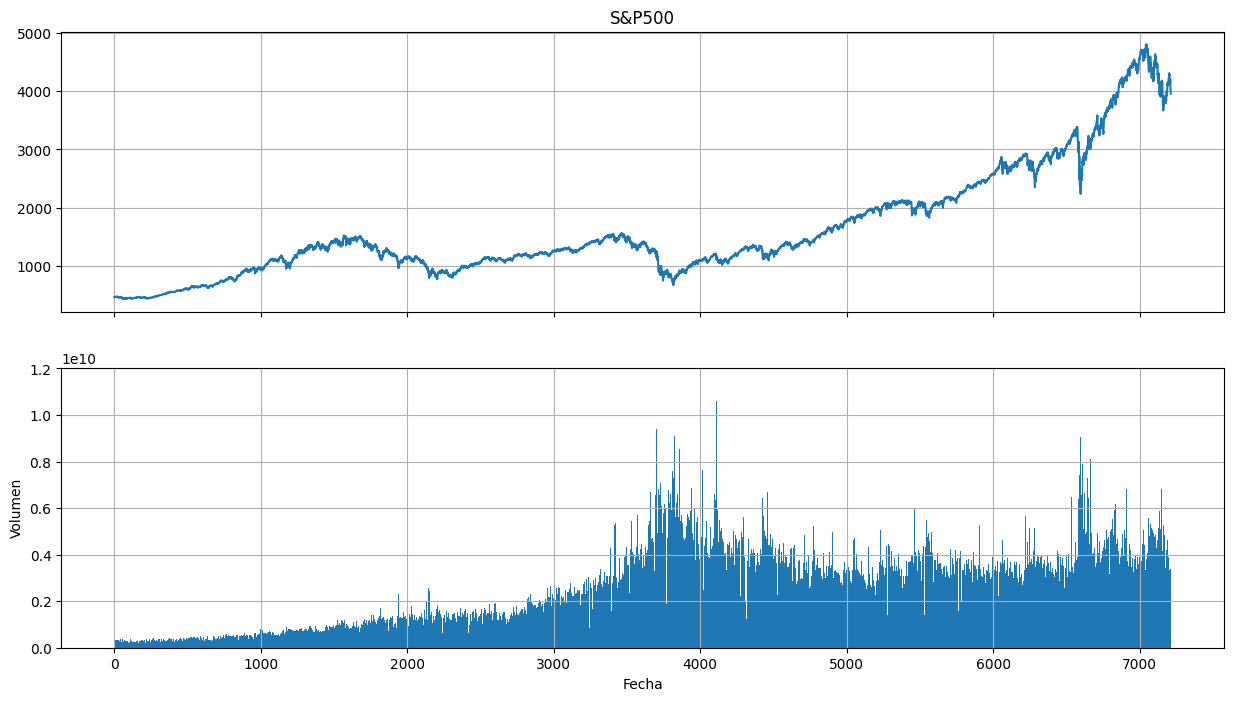

In [39]:
def plot_candlestick(df):
    fig, ax = plt.subplots(figsize=(15,8))
    candlestick_ochl(ax, df[['Open', 'Close', 'High', 'Low']].values, width=0.6, colorup='g', colordown='r', alpha=0.8)
    ax.xaxis_date()
    ax.autoscale_view()
    ax.grid(True)
    plt.title('Gráfico de velas S&P500')
    plt.xlabel('Fecha')
    plt.ylabel('Precio')
    plt.show()

# Trama del grafico de velas y volumen
fig, axs = plt.subplots(2, sharex=True, figsize=(15,8))
axs[0].set_title('S&P500')
axs[0].plot(df.index, df['Adj Close'])
axs[0].grid(True)
axs[1].bar(df.index, df['Volume'], width=1)
axs[1].grid(True)
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.show()

In [45]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo

# Importar los precios de cierre mensuales del S&P 500 durante los últimos 10 años
sp500 = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1262322000&period2=1645870800&interval=1mo&events=history&includeAdjustedClose=true")

# Calcular el retorno mensual del S&P 500
sp500["return"] = sp500["Adj Close"].pct_change()

# Calcular el ROI
initial_price = sp500.iloc[0]["Adj Close"]
sp500["ROI"] = (sp500["Adj Close"] / initial_price - 1) * 100

# Crear un gráfico de línea interactiva con Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=sp500["Date"], y=sp500["ROI"], mode="lines"))

# Configurar el diseño del gráfico
fig.update_layout(
    title="ROI de una inversión en el S&P 500 durante los últimos 10 años",
    xaxis_title="Fecha",
    yaxis_title="ROI (%)",
    hovermode="x unified"
)

# Mostrar el gráfico
pyo.plot(fig, filename="sp500_roi.html")

'sp500_roi.html'

## ROI ##

OBTENCION DE DIVIDENDOS: Los dividendos, son pagos en efectivo o en acciones que realizan algunas empresas a sus accionistas como una parte de las ganancias obtenidas por la empresa.

In [69]:
# Definimos el ticker del S&P 500 como ^GSPC
ticker = "^GSPC"

# Descargamos los datos financieros del S&P 500 utilizando el método Ticker de yfinance
sp500_data = yf.Ticker(ticker)

# Obtenemos los dividendos del S&P 500 en un rango de tiempo específico utilizando el método history de yfinance
dividends = sp500_data.history(start="2000-01-01", end="2021-12-31", actions=True)["Dividends"]

# Imprimimos los dividendos obtenidos
print(dividends)





Date
2000-01-03 00:00:00-05:00    0.0
2000-01-04 00:00:00-05:00    0.0
2000-01-05 00:00:00-05:00    0.0
2000-01-06 00:00:00-05:00    0.0
2000-01-07 00:00:00-05:00    0.0
                            ... 
2021-12-23 00:00:00-05:00    0.0
2021-12-27 00:00:00-05:00    0.0
2021-12-28 00:00:00-05:00    0.0
2021-12-29 00:00:00-05:00    0.0
2021-12-30 00:00:00-05:00    0.0
Name: Dividends, Length: 5535, dtype: float64


+ Al revisar los dividendos del S&P 500, necesarios para calcular el ROI, vemos que su valor constante es 0. En la formula solo implican una sumatoria, decidí no incluirlos en el dataset a utilizar. 

+ A modo ejemplificador veremos una inversion de 10 años que nos muestre el porcentaje de gananacia hubiesemos tenido en nuestra inversión si hubiesemos invertido capital en los ultimos 10 años en el S&P500. 

In [70]:
# Importar los precios de cierre mensuales del S&P 500 durante los últimos 10 años
sp500 = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EGSPC?period1=1262322000&period2=1645870800&interval=1mo&events=history&includeAdjustedClose=true")

# Calcular el retorno mensual del S&P 500
sp500["return"] = sp500["Adj Close"].pct_change()

# Sumar los retornos mensuales para obtener el retorno total durante los últimos 10 años
total_return = (1 + sp500["return"]).prod() - 1

# Calcular el ROI dividiendo el retorno total entre el costo inicial de la inversión
initial_price = sp500.iloc[0]["Adj Close"]
roi = total_return / initial_price

# Imprimir el ROI
print("El ROI de una inversión en el S&P 500 durante los últimos 10 años es: {:.2%}".format(roi))

El ROI de una inversión en el S&P 500 durante los últimos 10 años es: 0.29%


+ Apreciamos que con todas los retornos mensuales y el retorno final de la inversion nuestra ganancia hubiese sido del 29%. Es decir con un promedio del 2.9% anual. 

+ Comparandolo con el plazo fijo: Algunos bancos (Dentro de los Estados Unidos) brindan ganancias efectivas de hasta el 2% anual. Cabe destacar que en otros bancos las tasas oscilan entre el 0,3 y 0,5% anual. Siendo este ultimo una inversion de bajo riesgo.


invertir en una empresa en particular, implica un mauor riesgo, la diversificacion de rubros 

## ORO ##
se obtendra la cotizacion del oro desde el año 2010 para realizar una comparacion con una de las 'monedas'de intercambio mas fuertes y estables de la historia. Mostrando su relacion y explorando el interjuego que entre ellas se produce.  

In [ ]:
gold = yf.download("GC=F", start="2010-01-01", end="2022-02-23")
gold.to_csv('oro.csv')

[*********************100%***********************]  1 of 1 completed


## Índice de Volatilidad 
El índice de volatilidad, también conocido como VIX, es un indicador que mide la volatilidad implícita en el mercado de opciones sobre el índice S&P 500. En otras palabras, el VIX refleja las expectativas del mercado sobre la volatilidad futura del S&P 500, que es uno de los principales índices bursátiles de Estados Unidos. El VIX es a menudo llamado el "indicador del miedo" ya que su valor tiende a aumentar cuando los inversores esperan que los mercados sean más volátiles y a disminuir cuando los inversores esperan que los mercados sean más estables.

El VIX se calcula utilizando los precios de las opciones del S&P 500 en el mercado y se expresa en términos de porcentaje anualizado de la desviación estándar del S&P 500. Un valor alto del VIX indica una mayor volatilidad esperada, mientras que un valor bajo del VIX indica una menor volatilidad esperada. El VIX es utilizado por los inversores y analistas para evaluar el riesgo del mercado y para tomar decisiones de inversión en consecuencia.


extraido de (https://finance.yahoo.com/quote/%5EVIX/history?p=%5EVIX)